<a href="https://colab.research.google.com/github/contatofe/Estudos-e-Desafios/blob/main/Testes%20de%20Hip%C3%B3tese/Bioestat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset - Sleep Deprivation & Cognitive Performance** **negrito**

Retirado de [Kaggle](https://www.kaggle.com/datasets/sacramentotechnology/sleep-deprivation-and-cognitive-performance/data)

# Importações

In [98]:
#Importações

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, mannwhitneyu, kruskal
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/Bioestatística/sleep_deprivation_dataset_detailed.csv')

# Análise exploratória - Conhecendo os dados

**Testes cognitivos aplicados:**

1. **Stroop Task**

Um teste clássico de atenção seletiva e inibição cognitiva. A pessoa precisa dizer a cor da tinta com que uma palavra está escrita (por exemplo, a palavra “azul” escrita em vermelho). Mede a capacidade de controlar interferências automáticas da leitura e focar na tarefa relevante.


2. **N-Back Test**

Avalia memória de trabalho e atenção. A pessoa vê uma sequência de estímulos (letras, números, imagens) e precisa indicar quando o estímulo atual é igual ao que apareceu N posições atrás (ex: 2-back → comparar com o de duas posições antes). Quanto maior o N, mais exige atualização e manutenção ativa da informação.

3. **Psychomotor Vigilance Task (PVT)**

Um teste de atenção sustentada e vigilância. A pessoa deve responder o mais rápido possível a estímulos simples (ex: luz ou número que aparece na tela). Mede tempo de reação e lapsos de atenção, sendo muito usado em estudos de fadiga e sonolência.



In [52]:
df.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


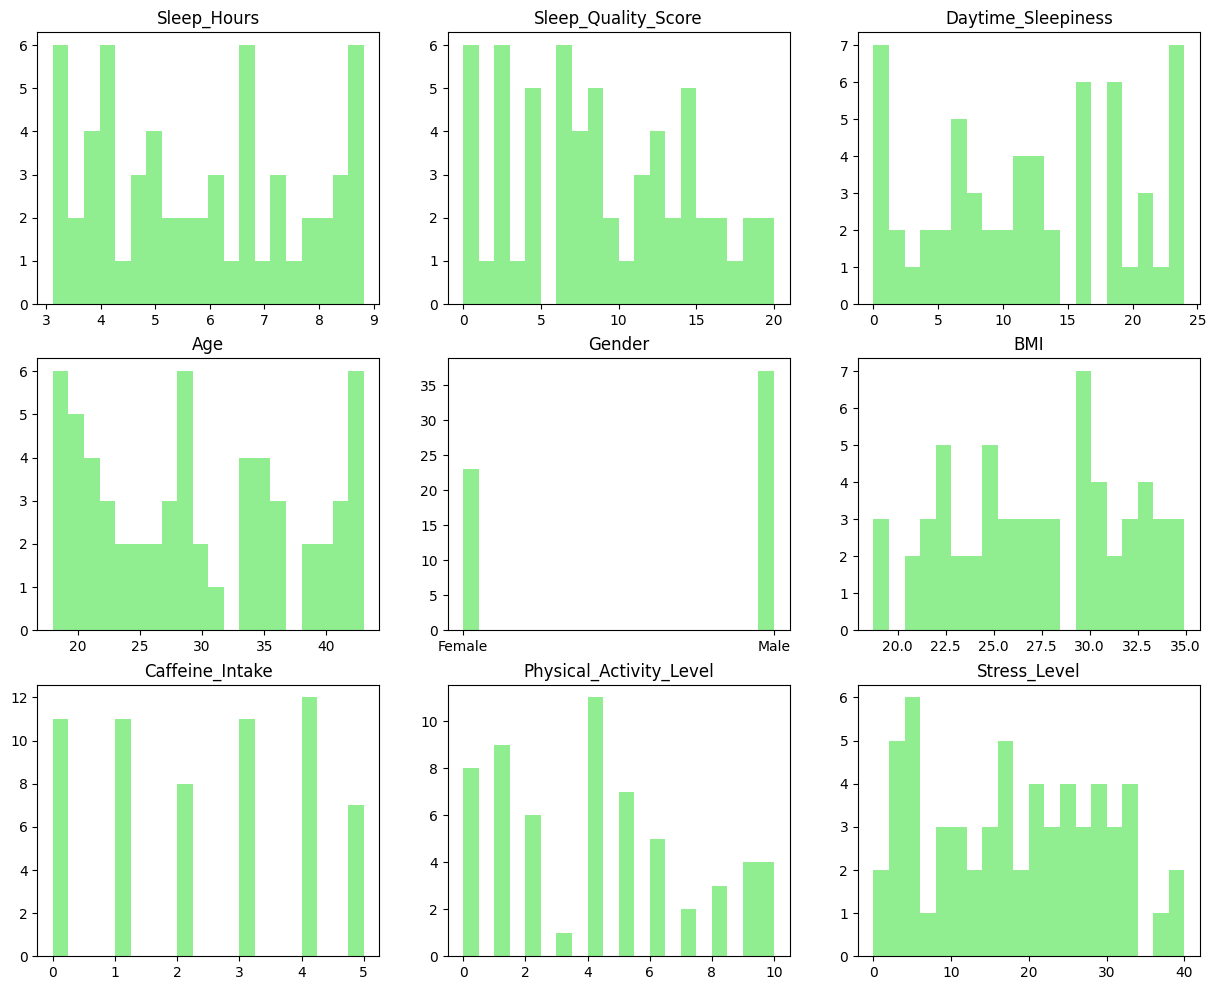

In [53]:
columns = ['Sleep_Hours', 'Sleep_Quality_Score', 'Daytime_Sleepiness', 'Age', 'Gender', 'BMI', 'Caffeine_Intake', 'Physical_Activity_Level', "Stress_Level"]

n_rows = 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

for ax, col in zip(axes.ravel(), columns):
    ax.hist(df[col], bins=20, color="lightgreen")
    ax.set_title(f"{col}")


In [58]:
print(f'O dataframe conta com {len(df)} registros');

O dataframe conta com 60 registros


In [55]:
proportion_gender = round(((df['Gender'] == 'Male').sum()/(df['Gender'] == 'Female').sum()),2)
print(f'A proporção entre homens e mulheres é de {proportion_gender}')

A proporção entre homens e mulheres é de 1.61


In [56]:
print(f'A idade mínima é de {df["Age"].min()} anos')
print(f'A idade máxima é de {df["Age"].max()} anos')

A idade mínima é de 18 anos
A idade máxima é de 43 anos


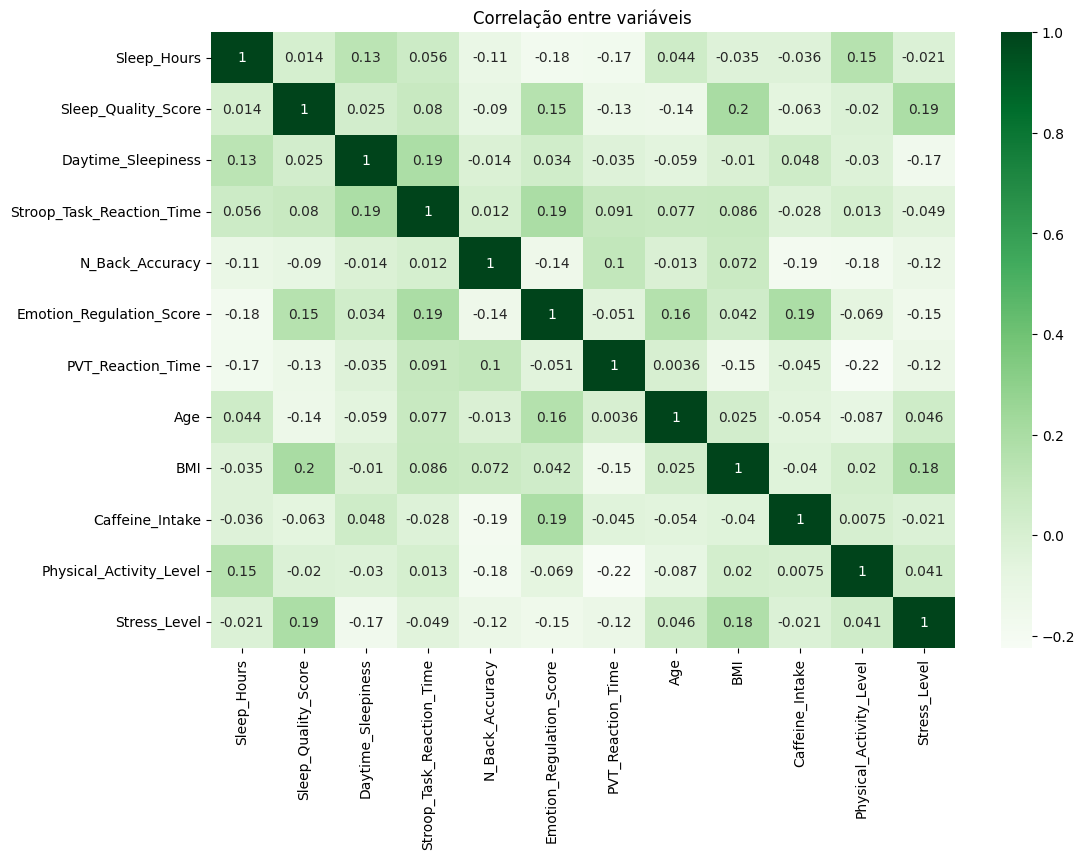

In [61]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

corr = df[num_cols].corr(method="pearson")

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title("Correlação entre variáveis")
plt.show()

##**Considerações sobre os dados:**

1. Existe uma diferença na quantidade entre homens e mulheres no dataframe.
2. O dataset inclui pessoas de 18 a 43 anos.
3. Não existem grandes correlações entre as variáveis numéricas.

# Testes de normalidade

## Teste de Shapiro-Wilk

In [63]:
for col in num_cols:
    stat, p = shapiro(df[col])
    print(f"{col}: stat={stat:.3f}, p={p:.3f} -> {'Normal' if p>0.05 else 'Não normal'}")

Sleep_Hours: stat=0.929, p=0.002 -> Não normal
Sleep_Quality_Score: stat=0.955, p=0.027 -> Não normal
Daytime_Sleepiness: stat=0.943, p=0.008 -> Não normal
Stroop_Task_Reaction_Time: stat=0.952, p=0.019 -> Não normal
N_Back_Accuracy: stat=0.959, p=0.043 -> Não normal
Emotion_Regulation_Score: stat=0.951, p=0.017 -> Não normal
PVT_Reaction_Time: stat=0.944, p=0.009 -> Não normal
Age: stat=0.926, p=0.001 -> Não normal
BMI: stat=0.956, p=0.030 -> Não normal
Caffeine_Intake: stat=0.906, p=0.000 -> Não normal
Physical_Activity_Level: stat=0.925, p=0.001 -> Não normal
Stress_Level: stat=0.958, p=0.038 -> Não normal


## Teste de Kolgomorov-Smirnov

In [83]:
for col in num_cols:
    stat, p = kstest(df[col], 'norm')
    print(f"{col}: stat={stat:.3f}, p={p:.3f} -> {'Normal (N(0,1))' if p>0.05 else 'Não normal (N(0,1))'}")

Sleep_Hours: stat=0.999, p=0.000 -> Não normal (N(0,1))
Sleep_Quality_Score: stat=0.861, p=0.000 -> Não normal (N(0,1))
Daytime_Sleepiness: stat=0.861, p=0.000 -> Não normal (N(0,1))
Stroop_Task_Reaction_Time: stat=0.945, p=0.000 -> Não normal (N(0,1))
N_Back_Accuracy: stat=1.000, p=0.000 -> Não normal (N(0,1))
Emotion_Regulation_Score: stat=1.000, p=0.000 -> Não normal (N(0,1))
PVT_Reaction_Time: stat=1.000, p=0.000 -> Não normal (N(0,1))
Age: stat=1.000, p=0.000 -> Não normal (N(0,1))
BMI: stat=1.000, p=0.000 -> Não normal (N(0,1))
Caffeine_Intake: stat=0.658, p=0.000 -> Não normal (N(0,1))
Physical_Activity_Level: stat=0.708, p=0.000 -> Não normal (N(0,1))
Stress_Level: stat=0.944, p=0.000 -> Não normal (N(0,1))


##QQ Plot

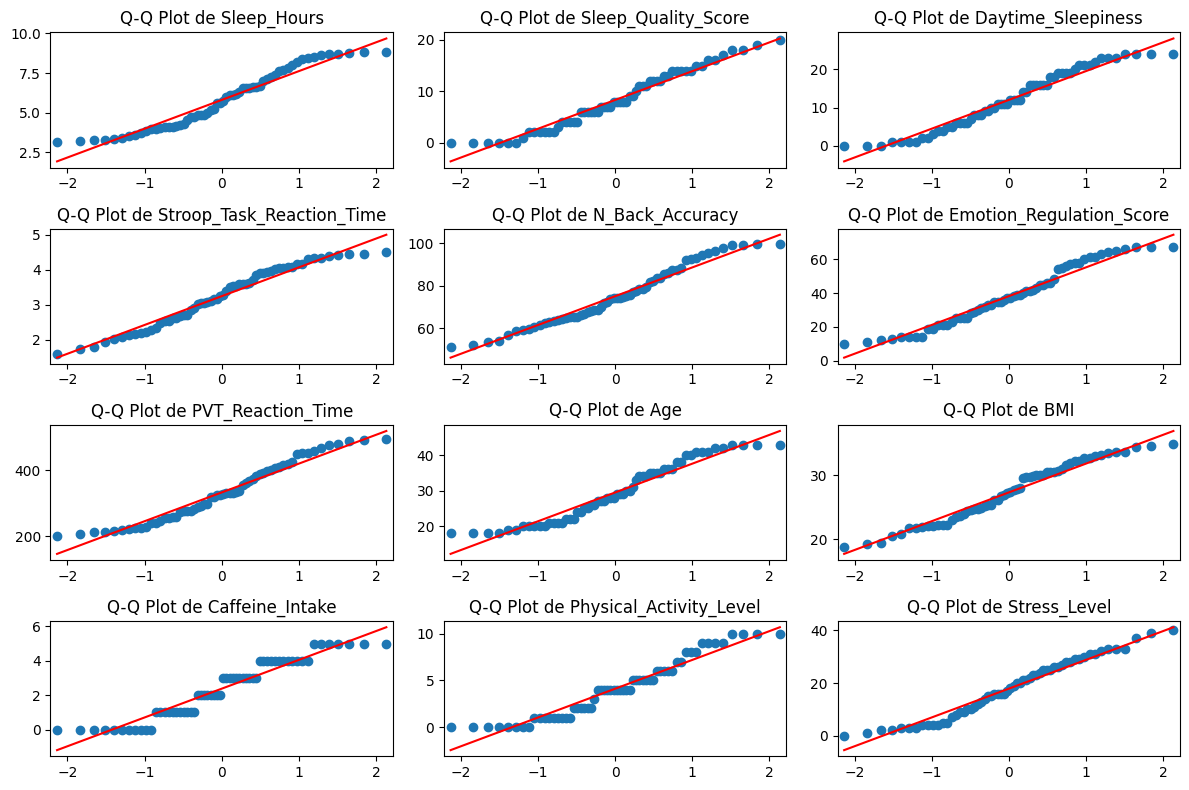

In [81]:
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    ax = axes[i]
    sm.qqplot(df[col], line='s', ax=ax, color='lightgreen')
    ax.get_lines()[0].set_color('gray')
    ax.set_title(f"Q-Q Plot de {col}")

    ax.set_xlabel("")   # remove label do eixo X
    ax.set_ylabel("")   # remove label do eixo Y

plt.tight_layout()
plt.show();

# Testes de Hipótese

Casos os dados fossem normais usaria o Teste T e a ANOVA como Testes de Hipótese Paramétricos. Como os resultados foram de não normalidade, seguiremos com os testes de Mann–Whitney e Kruskal–Wallis.

## Mann-Whitney

Hipótese alternativa: Há diferença entre a performance no Stroop Test entre homens e mulheres.

In [90]:
male = df[df["Gender"] == "Male"]["Stroop_Task_Reaction_Time"]
female = df[df["Gender"] == "Female"]["Stroop_Task_Reaction_Time"]

In [92]:
stat, p = mannwhitneyu(male, female, alternative="two-sided")
print(f"Mann-Whitney U: U={stat:.3f}, p={p:.3f}")

Mann-Whitney U: U=426.500, p=0.994


Com um p>0.05, a hipótese alternativa é rejeitada. Portanto, não há diferença entre os gêneros na performance do Stroop Test.

##MANOVA

Hipótese alternativa: Há diferença entre o grupo privado de sono e o grupo com sono normal (controle)

In [103]:
df['Grupos'] = df['Sleep_Hours'].apply(lambda x: 'Privado' if x < 7 else 'Controle')

In [109]:
proportion_groups = round((df['Grupos']=='Privado').sum()/(df['Grupos']=='Controle').sum(),2)

print(f'O grupo de Privados é {proportion_groups}x maior que o grupo Controle, o que geraria um desbalanço. Então o teste segue apenas por motivos didáticos.')

O grupo de Privados é 2.53x maior que o grupo Controle, o que geraria um desbalanço. Então o teste segue apenas por motivos didáticos.


In [110]:
dvs = ["Stroop_Task_Reaction_Time", "N_Back_Accuracy", "PVT_Reaction_Time"]
formula = " + ".join(dvs) + " ~ C(Grupos)"

In [112]:
maov = MANOVA.from_formula(formula, data=df)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0627 3.0000 56.0000 278.8564 0.0000
         Pillai's trace  0.9373 3.0000 56.0000 278.8564 0.0000
 Hotelling-Lawley trace 14.9387 3.0000 56.0000 278.8564 0.0000
    Roy's greatest root 14.9387 3.0000 56.0000 278.8564 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Grupos)        Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.9779 3.0000 56.0000  0.4228 0.7374
           Pillai's trace 0.0221 3.0000 56.0000  0.4228 0.7374
   Hotellin

Nesse caso não podemos dizer que o efeito do sono afeta as 3 variáveis de teste.